In [225]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve
import matplotlib.patches as patches


##################머신러닝 모듈 ################

from sklearn.model_selection import train_test_split #사이킷런 import
from sklearn.linear_model import LinearRegression

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)


In [226]:
file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/car.csv"

data = pd.read_csv(file_url , skipinitialspace= True) #빈칸 모두 제거

data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [228]:
round(data.describe() , 2)

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


In [229]:
data['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8128, dtype: object

In [230]:
data['engine'].str.split(expand = True) # 컬럼 하나씩만 인덱싱 해준다.
#공백 기준으로 문자를 분할하여 별도의 변수로 출력

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [231]:
# data['engine_unit']

In [232]:
data[['engine' , 'engine_unit']] = data['engine'].str.split(expand = True)

# 분할된 문자들을 새로운 변수들로 저장

data['engine'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

In [233]:
data['engine'] = data['engine'].astype('float32') # 숫자형 변수로 변환

In [234]:
data['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float32

In [235]:
data['engine_unit'].value_counts()

CC    7907
Name: engine_unit, dtype: int64

In [236]:
data['engine_unit'].unique()

array(['CC', nan], dtype=object)

In [237]:
data.drop('engine_unit' , axis = 1 , inplace =True) #CC라는 값만 한 가지 존재하여 해당 컬럼 제거

In [238]:
data['max_power']

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8128, dtype: object

In [239]:
data[['max_power' , 'max_power_unit']] = data['max_power'].str.split(expand = True)
# 분할된 문자들을 새로운 변수들로 저장

In [240]:
data['max_power'].head()

0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object

In [241]:
data['max_power_unit'].head()

0    bhp
1    bhp
2    bhp
3    bhp
4    bhp
Name: max_power_unit, dtype: object

In [242]:
# data['max_power'] = data['max_power'].astype('float32') # 숫자형 변수로 변환

In [243]:
data[data['max_power'] == 'bhp'] #max_power 내에 bhp 문자가 있는지 확인

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796.0,bhp,NaN,8.0,None


In [244]:
def isFloat(value): # 함수 정의
    try : # 시도
        num = float(value) # 값을 숫자로 변환
        return num # 변환된 값 리턴

    except ValueError: # try에서 ValueError가 난 경우
        return np.NaN # np.NaN 리턴

In [245]:
data['max_power'] = data['max_power'].apply(isFloat)

In [246]:
data['max_power_unit'].unique()

array(['bhp', nan, None], dtype=object)

In [247]:
data.drop('max_power_unit' , axis =1 , inplace =True)

In [248]:
data[['mileage' , 'mileage_unit']] = data['mileage'].str.split(expand = True)

# 분할된 문자들을 새로운 변수들로 저장

In [249]:
data['mileage'] = data['mileage'].astype('float32')

In [250]:
data['mileage_unit'].unique()

array(['kmpl', 'km/kg', nan], dtype=object)

In [251]:
data['fuel'].unique()

# Petrol : 리터당 80.43$
# Diesel : 리터당 73.56$
# LPG : 킬로그램당 40.85$
# CNG : 킬로그램당 44.23$

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [252]:
def mile(x) :
    if x['fuel'] == 'Petrol':
        return x['mileage'] / 80.43
    elif x['fuel'] == 'Diesel':
        return x['mileage'] / 73.56
    elif x['fuel'] == 'LG':
        return x['mileage'] / 40.85
    elif x['fuel'] == 'CNG':
        return x['mileage'] / 44.23

In [253]:
data[['fuel' ,'mileage']]

,fuel,mileage
0,Diesel,23.400000
1,Diesel,21.139999
2,Petrol,17.700001
3,Diesel,23.000000
4,Petrol,16.100000
...,...,...
8123,Petrol,18.500000
8124,Diesel,16.799999
8125,Diesel,19.299999
8126,Diesel,23.570000


In [254]:
data['mileage'] = data.apply(mile , axis=1) # mile 함수로 마일리지 수정
data[['fuel' ,'mileage']]

,fuel,mileage
0,Diesel,0.318108
1,Diesel,0.287384
2,Petrol,0.220067
3,Diesel,0.312670
4,Petrol,0.200174
...,...,...
8123,Petrol,0.230014
8124,Diesel,0.228385
8125,Diesel,0.262371
8126,Diesel,0.320419


In [255]:
data.drop('mileage_unit' , axis = 1 , inplace =True)

In [256]:
data['torque'].head()

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
Name: torque, dtype: object

In [257]:
data['torque'] = data['torque'].str.upper() # torque 변수 대문자로 변환

In [258]:
data['torque']

0                  190NM@ 2000RPM
1             250NM@ 1500-2500RPM
2           12.7@ 2,700(KGM@ RPM)
3        22.4 KGM AT 1750-2750RPM
4           11.5@ 4,500(KGM@ RPM)
                  ...            
8123             113.7NM@ 4000RPM
8124    24@ 1,900-2,750(KGM@ RPM)
8125               190NM@ 2000RPM
8126          140NM@ 1800-3000RPM
8127          140NM@ 1800-3000RPM
Name: torque, Length: 8128, dtype: object

In [259]:
def torque_unit(x):
    if 'NM' in str(x):
        return 'NM'
    elif 'KGM' in str(x):
        return 'kgm'


data['torque_unit'] = data['torque'].apply(torque_unit)

data[['torque' , 'torque_unit']]

,torque,torque_unit
0,190NM@ 2000RPM,NM
1,250NM@ 1500-2500RPM,NM
2,"12.7@ 2,700(KGM@ RPM)",kgm
3,22.4 KGM AT 1750-2750RPM,kgm
4,"11.5@ 4,500(KGM@ RPM)",kgm
...,...,...
8123,113.7NM@ 4000RPM,NM
8124,"24@ 1,900-2,750(KGM@ RPM)",kgm
8125,190NM@ 2000RPM,NM
8126,140NM@ 1800-3000RPM,NM


In [260]:
data['torque_unit'].unique()

array(['NM', 'kgm', None], dtype=object)

In [261]:
data['torque_unit'].isna()
data[data['torque_unit'].isna()]
data[data['torque_unit'].isna()]['torque'].unique() # torque_unit이 NULL 값인 행의 'torque' 열의 고윳값 출력

array([nan, '250@ 1250-5000RPM', '510@ 1600-2400', '110(11.2)@ 4800',
       '210 / 1900'], dtype=object)

In [262]:
data['torque_unit'].fillna('Nm' , inplace = True) # 결측치를 Nm으로 대체

In [263]:
string_example = '12.7@ 2,700(KGM@ RPM)' # 예제 스트링 정의

In [264]:
string_example[:4]

'12.7'

In [265]:
for i,j in enumerate(string_example):
    print(i , '번째 텍스트 : ' , j)

0 번째 텍스트 :  1
1 번째 텍스트 :  2
2 번째 텍스트 :  .
3 번째 텍스트 :  7
4 번째 텍스트 :  @
5 번째 텍스트 :   
6 번째 텍스트 :  2
7 번째 텍스트 :  ,
8 번째 텍스트 :  7
9 번째 텍스트 :  0
10 번째 텍스트 :  0
11 번째 텍스트 :  (
12 번째 텍스트 :  K
13 번째 텍스트 :  G
14 번째 텍스트 :  M
15 번째 텍스트 :  @
16 번째 텍스트 :   
17 번째 텍스트 :  R
18 번째 텍스트 :  P
19 번째 텍스트 :  M
20 번째 텍스트 :  )


In [266]:
data['torque']

0                  190NM@ 2000RPM
1             250NM@ 1500-2500RPM
2           12.7@ 2,700(KGM@ RPM)
3        22.4 KGM AT 1750-2750RPM
4           11.5@ 4,500(KGM@ RPM)
                  ...            
8123             113.7NM@ 4000RPM
8124    24@ 1,900-2,750(KGM@ RPM)
8125               190NM@ 2000RPM
8126          140NM@ 1800-3000RPM
8127          140NM@ 1800-3000RPM
Name: torque, Length: 8128, dtype: object

In [267]:
def split_num(x):
    x = str(x)
    for i,j in enumerate(x):
        if j not in '0123456789.' : # 만약 j가 0123456789.에 포함되지 않으면
            cut=  i
            break
    return x[:cut]


In [268]:
# for i,j in enumerate(string_example):
#     # print(f'({i},{j})')
#
#     if j not in '0123456789.' : # 만약 j가 0123456789.에 포함되지 않으면
#         cut =  i
#         print(string_example[:cut])

In [269]:
data['torque']

0                  190NM@ 2000RPM
1             250NM@ 1500-2500RPM
2           12.7@ 2,700(KGM@ RPM)
3        22.4 KGM AT 1750-2750RPM
4           11.5@ 4,500(KGM@ RPM)
                  ...            
8123             113.7NM@ 4000RPM
8124    24@ 1,900-2,750(KGM@ RPM)
8125               190NM@ 2000RPM
8126          140NM@ 1800-3000RPM
8127          140NM@ 1800-3000RPM
Name: torque, Length: 8128, dtype: object

In [270]:
data['torque'] = data['torque'].apply(split_num)

data['torque']

0         190
1         250
2        12.7
3        22.4
4        11.5
        ...  
8123    113.7
8124       24
8125      190
8126      140
8127      140
Name: torque, Length: 8128, dtype: object

In [271]:
data['torque'] = data['torque'].replace('' , np.NaN)

In [272]:
data['torque'] = data['torque'].astype('float64')

In [273]:
def torque_trans(x) :
    if x['torque_unit'] == 'kgm':
        return x['torque'] * 9.8066
    else:
        return x['torque']

data['torque'] = data.apply(torque_trans , axis =1 ) #함수 적용
data['torque']

0       190.00000
1       250.00000
2       124.54382
3       219.66784
4       112.77590
          ...    
8123    113.70000
8124    235.35840
8125    190.00000
8126    140.00000
8127    140.00000
Name: torque, Length: 8128, dtype: float64

In [274]:
data.drop('torque_unit' , axis = 1 , inplace = True)

In [275]:
data['name']

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 8128, dtype: object

In [276]:
data['name'] = data['name'].str.split(expand=True)[0]
data['name']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: name, Length: 8128, dtype: object

In [277]:
data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [278]:
data['name'] = data['name'].replace('Land' , 'Land Rover')

In [279]:
data.isna().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.031496
engine           0.027190
max_power        0.026575
torque           0.027313
seats            0.027190
dtype: float64

In [280]:
data.dropna(inplace = True) #결측치 행 제거
len(data)

7871

In [281]:
data = pd.get_dummies(data , columns = ['name' , 'fuel' , 'seller_type' , 'transmission' , 'owner'], drop_first= True)
data

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,name_Volvo,fuel_Diesel,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.318108,1248.0,74.00,190.00000,5.0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,2014,370000,120000,0.287384,1498.0,103.52,250.00000,5.0,0,0,...,0,1,0,1,0,1,0,1,0,0
2,2006,158000,140000,0.220067,1497.0,78.00,124.54382,5.0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,0.312670,1396.0,90.00,219.66784,5.0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,2007,130000,120000,0.200174,1298.0,88.20,112.77590,5.0,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,0.230014,1197.0,82.85,113.70000,5.0,0,0,...,0,0,1,1,0,1,0,0,0,0
8124,2007,135000,119000,0.228385,1493.0,110.00,235.35840,5.0,0,0,...,0,1,0,1,0,1,1,0,0,0
8125,2009,382000,120000,0.262371,1248.0,73.90,190.00000,5.0,0,0,...,0,1,0,1,0,1,0,0,0,0
8126,2013,290000,25000,0.320419,1396.0,70.00,140.00000,5.0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [282]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(data.drop('selling_price' , axis =1 ) , data['selling_price'] , test_size= 0.2 ,random_state=100)
# 훈련 셋/ 시험 셋 분리


In [283]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state= 100)
model.fit(X_train , y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [284]:
from sklearn.metrics import mean_squared_error #RMSE 이용

print('train_rmse : ' , mean_squared_error(y_train , train_pred)**0.5 , 'test_rmse : ' , mean_squared_error(y_test , test_pred) **0.5)

train_rmse :  19307.50648187511 test_rmse :  187456.4594095657


In [288]:
from sklearn.model_selection import KFold


data.reset_index(drop=True , inplace =True) # drop 매개변수를 사용하지 않으면 기존 인덱스가 새로운 컬럼 형태로 추가된다.



In [289]:
data

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,name_Volvo,fuel_Diesel,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.318108,1248.0,74.00,190.00000,5.0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,2014,370000,120000,0.287384,1498.0,103.52,250.00000,5.0,0,0,...,0,1,0,1,0,1,0,1,0,0
2,2006,158000,140000,0.220067,1497.0,78.00,124.54382,5.0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,0.312670,1396.0,90.00,219.66784,5.0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,2007,130000,120000,0.200174,1298.0,88.20,112.77590,5.0,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7866,2013,320000,110000,0.230014,1197.0,82.85,113.70000,5.0,0,0,...,0,0,1,1,0,1,0,0,0,0
7867,2007,135000,119000,0.228385,1493.0,110.00,235.35840,5.0,0,0,...,0,1,0,1,0,1,1,0,0,0
7868,2009,382000,120000,0.262371,1248.0,73.90,190.00000,5.0,0,0,...,0,1,0,1,0,1,0,0,0,0
7869,2013,290000,25000,0.320419,1396.0,70.00,140.00000,5.0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [290]:
kf = KFold(n_splits=5) #KFold 객체 생성 , 5개로 분할

X = data.drop('selling_price' , axis =1 ) # 종속변수 제거하여 X에 저장
y = data['selling_price'] # 종속변수를 y에 저장

In [292]:
X

,year,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,name_BMW,...,name_Volvo,fuel_Diesel,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,0.318108,1248.0,74.00,190.00000,5.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,2014,120000,0.287384,1498.0,103.52,250.00000,5.0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
2,2006,140000,0.220067,1497.0,78.00,124.54382,5.0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,2010,127000,0.312670,1396.0,90.00,219.66784,5.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,2007,120000,0.200174,1298.0,88.20,112.77590,5.0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7866,2013,110000,0.230014,1197.0,82.85,113.70000,5.0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
7867,2007,119000,0.228385,1493.0,110.00,235.35840,5.0,0,0,0,...,0,1,0,1,0,1,1,0,0,0
7868,2009,120000,0.262371,1248.0,73.90,190.00000,5.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
7869,2013,25000,0.320419,1396.0,70.00,140.00000,5.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [293]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
7866    320000
7867    135000
7868    382000
7869    290000
7870    290000
Name: selling_price, Length: 7871, dtype: int64

In [291]:
for i, j in kf.split(X) : # 순회
    print(i , j )

[1575 1576 1577 ... 7868 7869 7870] [   0    1    2 ... 1572 1573 1574]
[   0    1    2 ... 7868 7869 7870] [1575 1576 1577 ... 3146 3147 3148]
[   0    1    2 ... 7868 7869 7870] [3149 3150 3151 ... 4720 4721 4722]
[   0    1    2 ... 7868 7869 7870] [4723 4724 4725 ... 6294 6295 6296]
[   0    1    2 ... 6294 6295 6296] [6297 6298 6299 ... 7868 7869 7870]


In [294]:
from sklearn.ensemble import RandomForestRegressor
train_rmse_total = []
test_rmse_total = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.loc[train_index] , X.loc[test_index]
    y_train , y_test = y[train_index] , y[test_index]


    model = RandomForestRegressor(random_state= 100) # 모델 객체 생성
    model.fit(X_train , y_train) # 학습
    train_pred = model.predict(X_train) # 훈련셋 예측
    test_pred = model.predict(X_test) # 시험셋 예측

    train_rmse = mean_squared_error(y_train , train_pred) **0.5 # 훈련 셋 rmse 계산

    test_rmse = mean_squared_error(y_test , test_pred) **0.5 # 시험 셋 rmse 계산


    train_rmse_total.append(train_rmse)

    test_rmse_total.append(test_rmse)

In [295]:
train_rmse_total

[50182.631776723334,
 55150.91743172602,
 53344.46144527171,
 53612.66417343678,
 54573.94740047315]

In [297]:
test_rmse_total

[161664.0540068676,
 133801.20625411597,
 125638.90379389358,
 144407.36004001717,
 144888.76592464716]

In [298]:
print('train_rmse : ' , sum(train_rmse_total)/5 , 'test_rmse :' , sum(test_rmse_total)/5)

train_rmse :  53372.924445526194 test_rmse : 142080.0580039083


In [299]:
from sklearn.ensemble import RandomForestRegressor
train_rmse_total = []
test_rmse_total = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.loc[train_index] , X.loc[test_index]
    y_train , y_test = y[train_index] , y[test_index]


    model = RandomForestRegressor(n_estimators= 300 , max_depth= 50 , min_samples_split=5 , min_samples_leaf= 1 , n_jobs= -1 , random_state= 100) # 모델 객체 생성
    model.fit(X_train , y_train) # 학습
    train_pred = model.predict(X_train) # 훈련셋 예측
    test_pred = model.predict(X_test) # 시험셋 예측

    train_rmse = mean_squared_error(y_train , train_pred) **0.5 # 훈련 셋 rmse 계산

    test_rmse = mean_squared_error(y_test , test_pred) **0.5 # 시험 셋 rmse 계산


    train_rmse_total.append(train_rmse)

    test_rmse_total.append(test_rmse)

In [300]:
print('train_rmse : ' , sum(train_rmse_total)/5 , 'test_rmse :' , sum(test_rmse_total)/5)

train_rmse :  66247.10952681283 test_rmse : 143874.03733534855


AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'

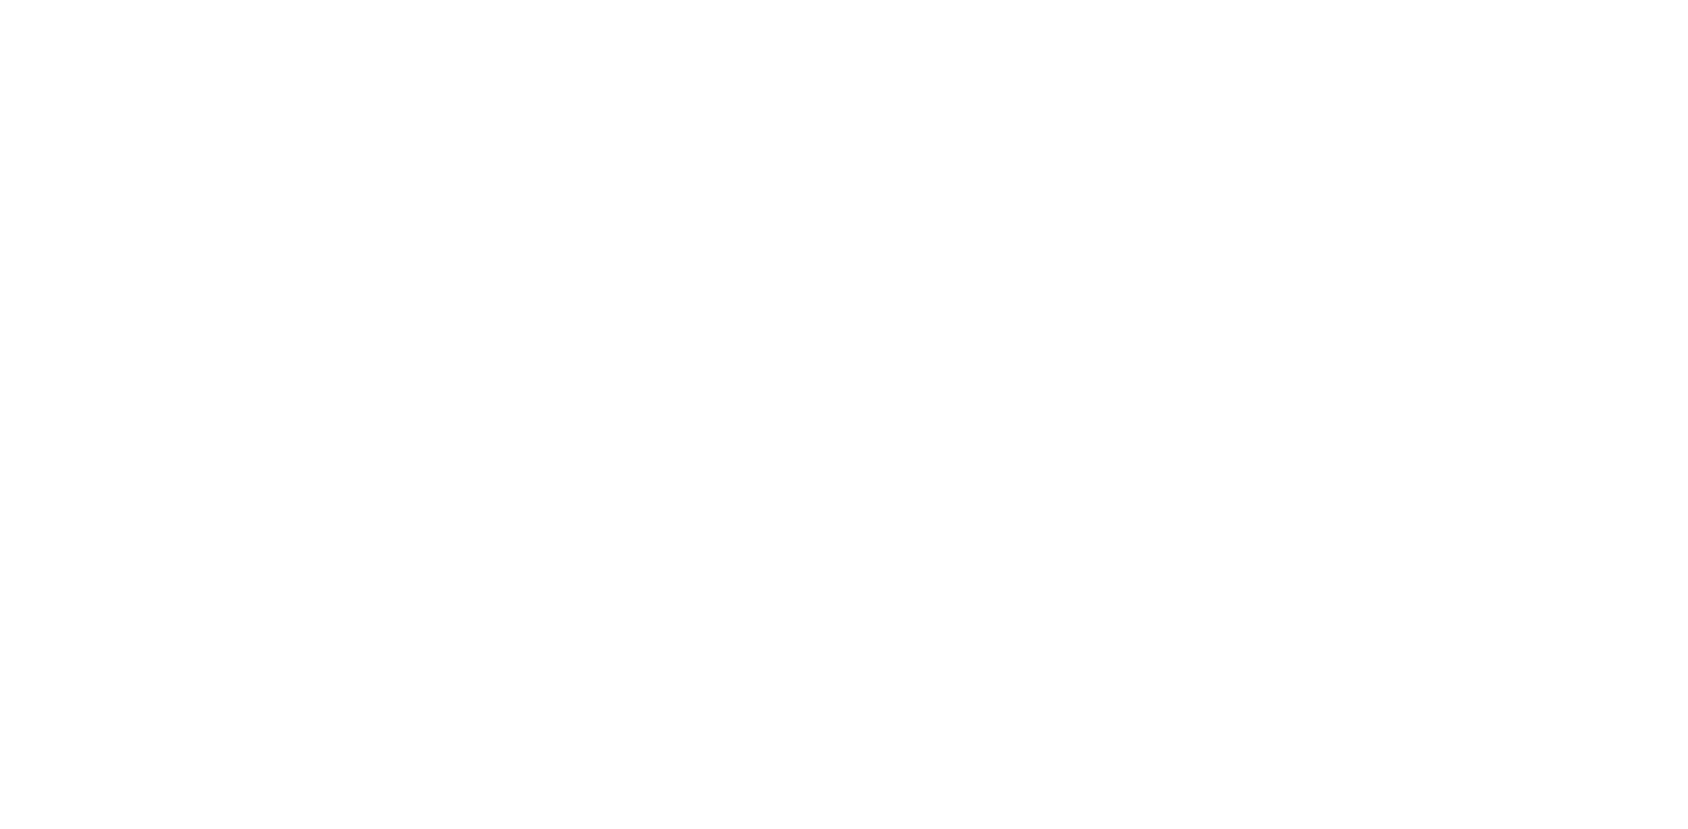

In [301]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize =  (30,15)) # 그래프 크기 설정

ax = plot_tree(model , max_depth= 3 , fontsize = 15) # 트리 그래프 출력

plt.show()